In [1]:
import os
import sys

In [2]:
from maquinas.recursivelyenumerable.tm import TuringMachine as TM
from maquinas.simulation import Simulation

In [3]:
# Creating automata finito
suma_uno_binario=TM(Q=['q_0','q_1','q_s','q_f'],
         sigma=['0','1','$'],
         gamma=[],
         q_0='q_0',
         A=['q_f'],
         delta=[
            (('q_0','$'),[('q_1','$','R')]),
            (('q_1','1'),[('q_1','1','R')]), 
            (('q_1','0'),[('q_1','0','R')]),
            (('q_1','[B]'),[('q_s','[B]','L')]),
            (('q_s','1'),[('q_s','0','L')]),
            (('q_s','0'),[('q_f','1','R')]),
            (('q_s','$'),[('q_f','1','R')]),
         ]
    )

In [4]:
for states in suma_uno_binario.delta_stepwise("$1000011"):
    if states:
        print(f"⊢ {suma_uno_binario.states2string(states)}",end="\n")
        res=states
    else:
        print("Halts")

⊢ q_0, …  _$_ 1000011 …
⊢ q_1, … $ _1_ 000011 …
⊢ q_1, … $1 _0_ 00011 …
⊢ q_1, … $10 _0_ 0011 …
⊢ q_1, … $100 _0_ 011 …
⊢ q_1, … $1000 _0_ 11 …
⊢ q_1, … $10000 _1_ 1 …
⊢ q_1, … $100001 _1_  …
⊢ q_1, … $1000011 _𝖁_  …
⊢ q_s, … $100001 _1_ 𝖁 …
⊢ q_s, … $10000 _1_ 0𝖁 …
⊢ q_s, … $1000 _0_ 00𝖁 …
⊢ q_f, … $10001 _0_ 0𝖁 …
Halts


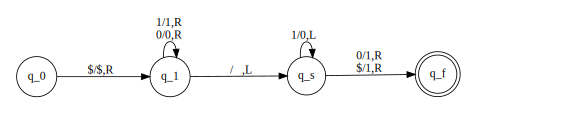

In [5]:
suma_uno_binario.graph()

In [6]:
a_n_b_m_c_nm=TM(Q=['q_0','q_1','q_2','q_3','q_4','q_5','q_6'],
         sigma=['0','1','$'],
         gamma=['X','Y'],
         q_0='q_0',
         A=['q_6'],
         delta=[
            (('q_0','a'),[('q_1','X','R')]),
            (('q_1','a'),[('q_1','a','R')]),
            (('q_1','b'),[('q_1','b','R')]),
            (('q_1','Y'),[('q_1','Y','R')]),
            (('q_1','c'),[('q_2','Y','L')]),
            (('q_2','a'),[('q_2','a','L')]),
            (('q_2','b'),[('q_2','b','L')]),
            (('q_2','Y'),[('q_2','Y','L')]),
            (('q_2','X'),[('q_0','X','R')]),
            (('q_0','b'),[('q_3','X','R')]),
            (('q_3','b'),[('q_3','b','R')]),
            (('q_3','Y'),[('q_3','Y','R')]),
            (('q_3','c'),[('q_4','Y','L')]),
            (('q_4','b'),[('q_4','b','L')]),
            (('q_4','Y'),[('q_4','Y','L')]),
            (('q_4','X'),[('q_0','X','R')]),
            (('q_0','Y'),[('q_5','Y','R')]),
            (('q_5','Y'),[('q_5','Y','R')]),
            (('q_5','[B]'),[('q_6','[B]','R')]),
            (('q_0','[B]'),[('q_6','[B]','R')]),
         ]
    )

In [7]:
for states in a_n_b_m_c_nm.delta_stepwise("bbcc"):
    if states:
        state,l,tape,(pos,_)=list(states)[0]
        print(f"⊢","".join([a_n_b_m_c_nm._tsymbol(t) for t in tape[:pos]]), a_n_b_m_c_nm._state(state), "".join([a_n_b_m_c_nm._tsymbol(t) for t in tape[pos:]]), end="\n")
        res=states
    else:
        print("Halts")

⊢  q_0 bbcc
⊢ X q_3 bcc
⊢ Xb q_3 cc
⊢ X q_4 bYc
⊢  q_4 XbYc
⊢ X q_0 bYc
⊢ XX q_3 Yc
⊢ XXY q_3 c
⊢ XX q_4 YY
⊢ X q_4 XYY
⊢ XX q_0 YY
⊢ XXY q_5 Y
⊢ XXYY q_5 𝖁
⊢ XXYY𝖁 q_6 𝖁
Halts


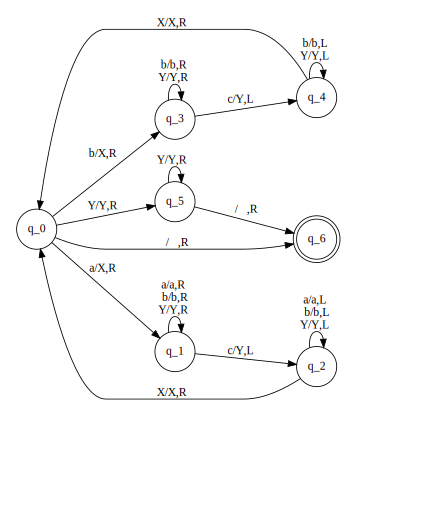

In [8]:
a_n_b_m_c_nm.graph()